# **DATA IMMERSION WITH PYTHON (Alura)**
# **BUSINESS PROBLEM**
-----------
Exercise:
    The importance of reducing credit risk has led a German financial institution to seek innovative solutions. 
Therefore, a precise and reliable machine learning model is created to more accurately assess the probability of credit default of its customers.

### **Description of Main Tasks:**
1. **Data Preprocessing:** Perform data cleaning, handle missing values, encode categorical variables, and normalize/scale data.

2. **Data Exploration:** Analyze and understand the provided dataset, identify key variables, and create visualizations to understand relationships between variables and select relevant features.

3. **Model Building:** Experiment with various machine learning algorithms such as Logistic Regression, Decision Trees, Random Forest, Naive Bayes, among others.

4. **Model Evaluation and Selection:** Evaluate models using metrics such as precision, recall, area under the ROC curve, and F1-score. Select the model with the best performance for predicting creditworthiness.

## **Additional Information:**

**Functions:**
> https://caelum-online-public.s3.amazonaws.com/alura-latam-inmersion-datos/inmersion-datos-2024/funciones-inmersion-clase01.txt

**Dictionary:**
> https://caelum-online-public.s3.amazonaws.com/alura-latam-inmersion-datos/inmersion-datos-2024/german_dataset_dictionary.txt

# **1. Environment Setup**
------------- 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# **2. Data Preprocessing**
---------- 


In [3]:
pd.set_option('display.max_columns', None)
global df_bank, results

In [7]:
df_bank = pd.read_csv('data\german_credit.csv')
df_bank.head(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,none,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,none,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,none,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,guarantor,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,none,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [8]:
df_bank.shape

(1000, 21)

In [9]:
df_bank.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

In [10]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   default                     1000 non-null   int64 
 1   account_check_status        1000 non-null   object
 2   duration_in_month           1000 non-null   int64 
 3   credit_history              1000 non-null   object
 4   purpose                     1000 non-null   object
 5   credit_amount               1000 non-null   int64 
 6   savings                     1000 non-null   object
 7   present_emp_since           1000 non-null   object
 8   installment_as_income_perc  1000 non-null   int64 
 9   personal_status_sex         1000 non-null   object
 10  other_debtors               1000 non-null   object
 11  present_res_since           1000 non-null   int64 
 12  property                    1000 non-null   object
 13  age                         1000 non-null   int64

In [11]:
df_bank.account_check_status.value_counts().index

Index(['no checking account', '< 0 DM', '0 <= ... < 200 DM',
       '>= 200 DM / salary assignments for at least 1 year'],
      dtype='object', name='account_check_status')

In [12]:
columns = list(df_bank.select_dtypes(include=['object']).columns)
for column in columns:
    print(f'The column name: {column}')
    print(list(df_bank[f'{column}'].value_counts().index))
    print('\n')


The column name: account_check_status
['no checking account', '< 0 DM', '0 <= ... < 200 DM', '>= 200 DM / salary assignments for at least 1 year']


The column name: credit_history
['existing credits paid back duly till now', 'critical account/ other credits existing (not at this bank)', 'delay in paying off in the past', 'all credits at this bank paid back duly', 'no credits taken/ all credits paid back duly']


The column name: purpose
['domestic appliances', 'car (new)', 'radio/television', 'car (used)', 'business', '(vacation - does not exist?)', 'education', 'repairs', 'furniture/equipment', 'retraining']


The column name: savings
['... < 100 DM', 'unknown/ no savings account', '100 <= ... < 500 DM', '500 <= ... < 1000 DM ', '.. >= 1000 DM ']


The column name: present_emp_since
['1 <= ... < 4 years', '.. >= 7 years', '4 <= ... < 7 years', '... < 1 year ', 'unemployed']


The column name: personal_status_sex
['male : single', 'female : divorced/separated/married', 'male : married

In [13]:
def process_data():
    global df_bank  # Changed from df_banco to df_bank
    df_bank = df_bank.drop_duplicates() if df_bank.duplicated().any() else df_bank
    df_bank = df_bank.dropna() if df_bank.isnull().values.any() else df_bank

    account_mapping = {'no checking account': 4,
                       '>= 200 DM / salary assignments for at least 1 year': 3,
                       '0 <= ... < 200 DM': 2,
                       '< 0 DM': 1
                       }
    df_bank['account_check_status'] = df_bank['account_check_status'].map(account_mapping)

    credit_history_mapping = {'no credits taken/ all credits paid back duly': 1,
                              'all credits at this bank paid back duly': 2,
                              'existing credits paid back duly till now': 3,
                              'delay in paying off in the past': 4,
                              'critical account/ other credits existing (not at this bank)': 5
                              }
    df_bank['credit_history'] = df_bank['credit_history'].map(credit_history_mapping)

    purpose_mapping = {'car (new)': 1,
                       'car (used)': 2,
                       'furniture/equipment': 3,
                       'radio/television': 4,
                       'domestic appliances': 5,
                       'repairs': 6,
                       'education': 7,
                       '(vacation - does not exist?)': 8,
                       'retraining': 9,
                       'business': 10,
                       'others': 11
                       }
    df_bank['purpose'] = df_bank['purpose'].map(purpose_mapping)

    savings_mapping = {'unknown/ no savings account': 1,
                       '.. >= 1000 DM ': 2,
                       '500 <= ... < 1000 DM ': 3,
                       '100 <= ... < 500 DM': 4,
                       '... < 100 DM': 5
                       }
    df_bank['savings'] = df_bank['savings'].map(savings_mapping)

    emp_since_mapping = {'.. >= 7 years': 1,
                        '4 <= ... < 7 years': 2,
                        '1 <= ... < 4 years': 3,
                        '... < 1 year ': 4,
                        'unemployed': 5
                        }
    df_bank['present_emp_since'] = df_bank['present_emp_since'].map(emp_since_mapping)

    status_sex_mapping = {'male : divorced/separated': 1,
                          'female : divorced/separated/married': 2,
                          'male : single': 3,
                          'male : married/widowed': 4,
                          'female : single': 5
                          }
    df_bank['personal_status_sex'] = df_bank['personal_status_sex'].map(status_sex_mapping)

    debtors_mapping = {'none': 1,
                       'co-applicant': 2,
                       'guarantor': 3
                       }
    df_bank['other_debtors'] = df_bank['other_debtors'].map(debtors_mapping)

    property_mapping = {'real estate': 1,
                        'if not A121 : building society savings agreement/ life insurance': 2,
                        'if not A121/A122 : car or other, not in attribute 6': 3,
                        'unknown / no property': 4
                        }
    df_bank['property'] = df_bank['property'].map(property_mapping)

    installment_plans_mapping = {'bank': 1,
                                'stores': 2,
                                'none': 3
                                }
    df_bank['other_installment_plans'] = df_bank['other_installment_plans'].map(installment_plans_mapping)

    housing_mapping = {'rent': 1,
                      'own': 2,
                      'for free': 3
                      }
    df_bank['housing'] = df_bank['housing'].map(housing_mapping)

    job_mapping = {'unemployed/ unskilled - non-resident': 1,
                   'unskilled - resident': 2,
                   'skilled employee / official': 3,
                   'management/ self-employed/ highly qualified employee/ officer': 4
                   }
    df_bank['job'] = df_bank['job'].map(job_mapping)

    telephone_mapping = {'yes, registered under the customers name ': 1,
                         'none': 0
                         }
    df_bank['telephone'] = df_bank['telephone'].map(telephone_mapping)

    foreign_worker_mapping = {'yes': 1,
                              'no': 0
                              }
    df_bank['foreign_worker'] = df_bank['foreign_worker'].map(foreign_worker_mapping)


In [14]:
process_data()
df_bank.sample(5)

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,other_debtors,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
774,0,3,12,5,1,1480,3,5,2,3,1,4,4,66,1,3,3,1,1,0,1
404,0,2,18,4,1,2899,1,1,4,3,1,4,3,43,3,2,1,3,2,0,1
784,0,2,20,3,2,6468,1,5,1,1,1,4,1,60,3,2,1,4,1,1,1
207,0,2,12,5,6,1424,5,2,4,3,1,3,2,26,3,2,1,3,1,0,1
204,0,4,12,5,1,1495,5,1,4,3,1,1,1,38,3,2,2,2,2,0,1


# **3. Data Exploration**
---------

In [15]:
discrete_variables = ['personal_status_sex', 'age', 'duration_in_month', 'credit_amount', 'default']
df_bank[discrete_variables].tail(3)


,personal_status_sex,age,duration_in_month,credit_amount,default
997,3,38,12,804,0
998,3,23,45,1845,1
999,3,27,45,4576,0


In [16]:
def feature_engineering():
    global df_bank  # Changed from df_banco to df_bank
    dic_sexo = {2: 1, 5: 1, 1: 0, 3: 0, 4: 0}
    dic_est_civil = {3: 1, 5: 1, 1: 0, 2: 0, 4: 0}
    df_bank['sexo'] = df_bank['personal_status_sex'].map(dic_sexo)
    df_bank['estado_civil'] = df_bank['personal_status_sex'].map(dic_est_civil)
    df_bank['rango_edad'] = pd.cut(x=df_bank['age'],
                                   bins=[18, 30, 40, 50, 60, 70, 80],
                                   labels=[1, 2, 3, 4, 5, 6]).astype(int)
    df_bank['rango_plazos_credito'] = pd.cut(x=df_bank['duration_in_month'],
                                             bins=[1, 12, 24, 36, 48, 60, 72],
                                             labels=[1, 2, 3, 4, 5, 6]).astype(int)
    df_bank['rango_valor_credito'] = pd.cut(x=df_bank['credit_amount'],
                                            bins=[1, 1000, 2000, 3000, 4000,
                                                  5000, 6000, 7000, 8000, 9000,
                                                  10000, 11000, 12000, 13000,
                                                  14000, 15000, 16000, 17000,
                                                  18000, 19000, 20000],
                                            labels=[1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                    10, 11, 12, 13, 14, 15, 16,
                                                    17, 18, 19, 20]).astype(int)
    df_bank = df_bank.drop(columns=['personal_status_sex', 'age',
                                    'duration_in_month', 'credit_amount'])


In [17]:
feature_engineering()
df_bank.head(2)

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
0,0,1,5,5,1,1,4,1,4,1,3,2,2,3,1,1,1,0,1,5,1,2
1,1,2,3,5,5,3,2,1,2,1,3,2,1,3,1,0,1,1,0,1,4,6


In [18]:
df_bank.describe()

,default,account_check_status,credit_history,purpose,savings,present_emp_since,installment_as_income_perc,other_debtors,present_res_since,property,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker,sexo,estado_civil,rango_edad,rango_plazos_credito,rango_valor_credito
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,0.300000,2.577000,3.54500,4.277000,3.895000,2.616000,2.973000,1.145000,2.845000,2.358000,2.675000,1.929000,1.407000,2.904000,1.155000,0.404000,0.963000,0.310000,0.54800,2.027000,1.975000,3.766000
std,0.458487,1.257638,1.08312,2.739302,1.580023,1.208306,1.118715,0.477706,1.103718,1.050209,0.705601,0.531264,0.577654,0.653614,0.362086,0.490943,0.188856,0.462725,0.49794,1.136469,0.968149,2.821206
min,0.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,1.000000,1.000000,1.000000
25%,0.000000,1.000000,3.00000,2.000000,3.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.00000,1.000000,1.000000,2.000000
50%,0.000000,2.000000,3.00000,4.000000,5.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.00000,2.000000,2.000000,3.000000
75%,1.000000,4.000000,5.00000,5.000000,5.000000,3.000000,4.000000,1.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.00000,3.000000,2.000000,4.000000
max,1.000000,4.000000,5.00000,10.000000,5.000000,5.000000,4.000000,3.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,2.000000,1.000000,1.000000,1.000000,1.00000,6.000000,6.000000,19.000000


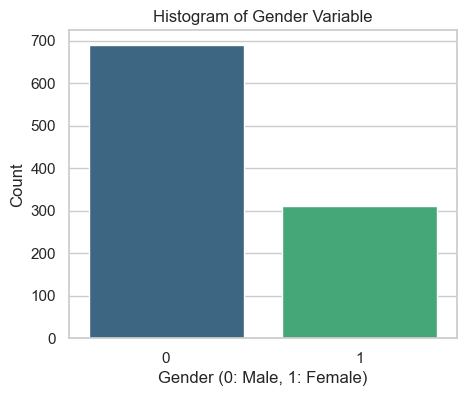

In [19]:
# Create a histogram of the 'sexo' variable using Seaborn and Matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 4))
sns.set(style="whitegrid")
sns.countplot(x='sexo', data=df_bank, palette='viridis')
plt.title('Histogram of Gender Variable')
plt.xlabel('Gender (0: Male, 1: Female)')
plt.ylabel('Count')
plt.show()


In [20]:
def exploratory_analysis():
    global df_bank
    histograms = ['sexo', 'estado_civil', 'rango_plazos_credito', 'rango_edad', 'default']
    list_histograms = list(enumerate(histograms))
    plt.figure(figsize=(30, 20))
    plt.title('Histograms')
    for i in list_histograms:
        plt.subplot(3, 2, i[0] + 1)
        sns.countplot(x=i[1], data=df_bank)
        plt.xlabel(i[1], fontsize=20)
        plt.ylabel('Total', fontsize=20)


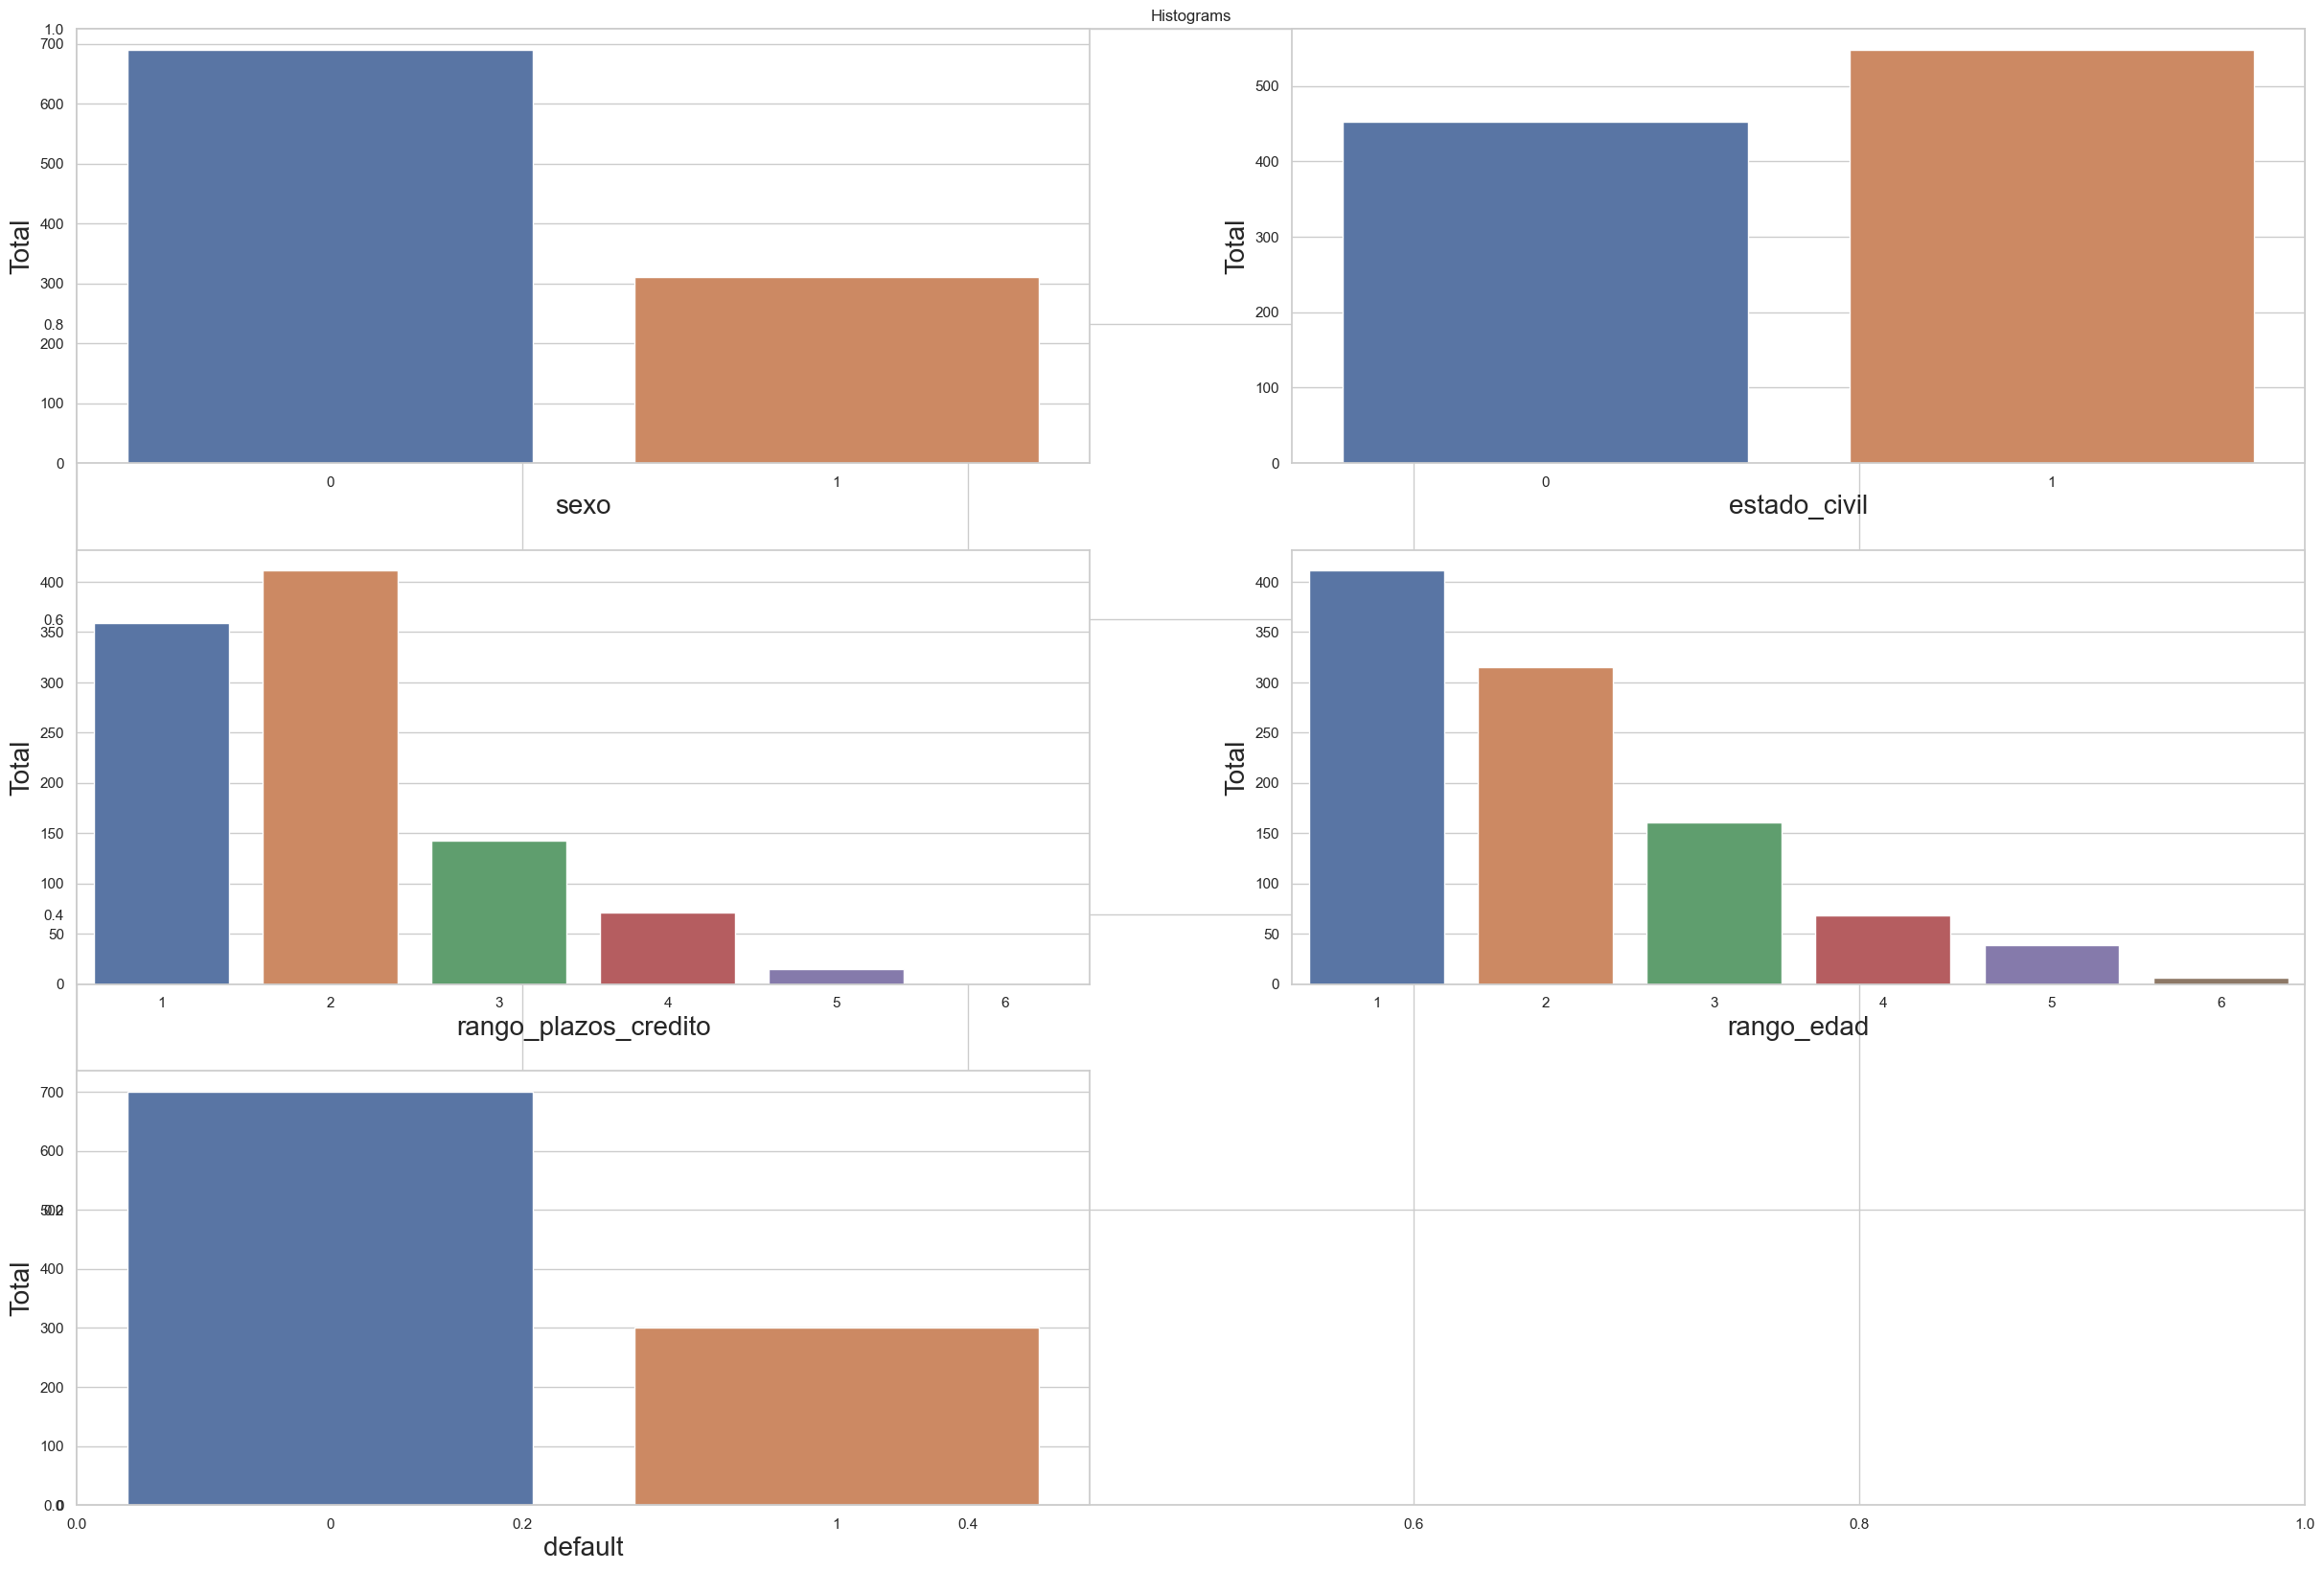

In [21]:
exploratory_analysis()

**Heatmap, visualizing:** Allows measuring how much variables are related to each other. If they are positively correlated, the color tends to be more red; if they are negatively correlated, it tends to be blue. If there is no relationship between the variables, it tends to have a neutral color.
'Correlation does not imply causation'


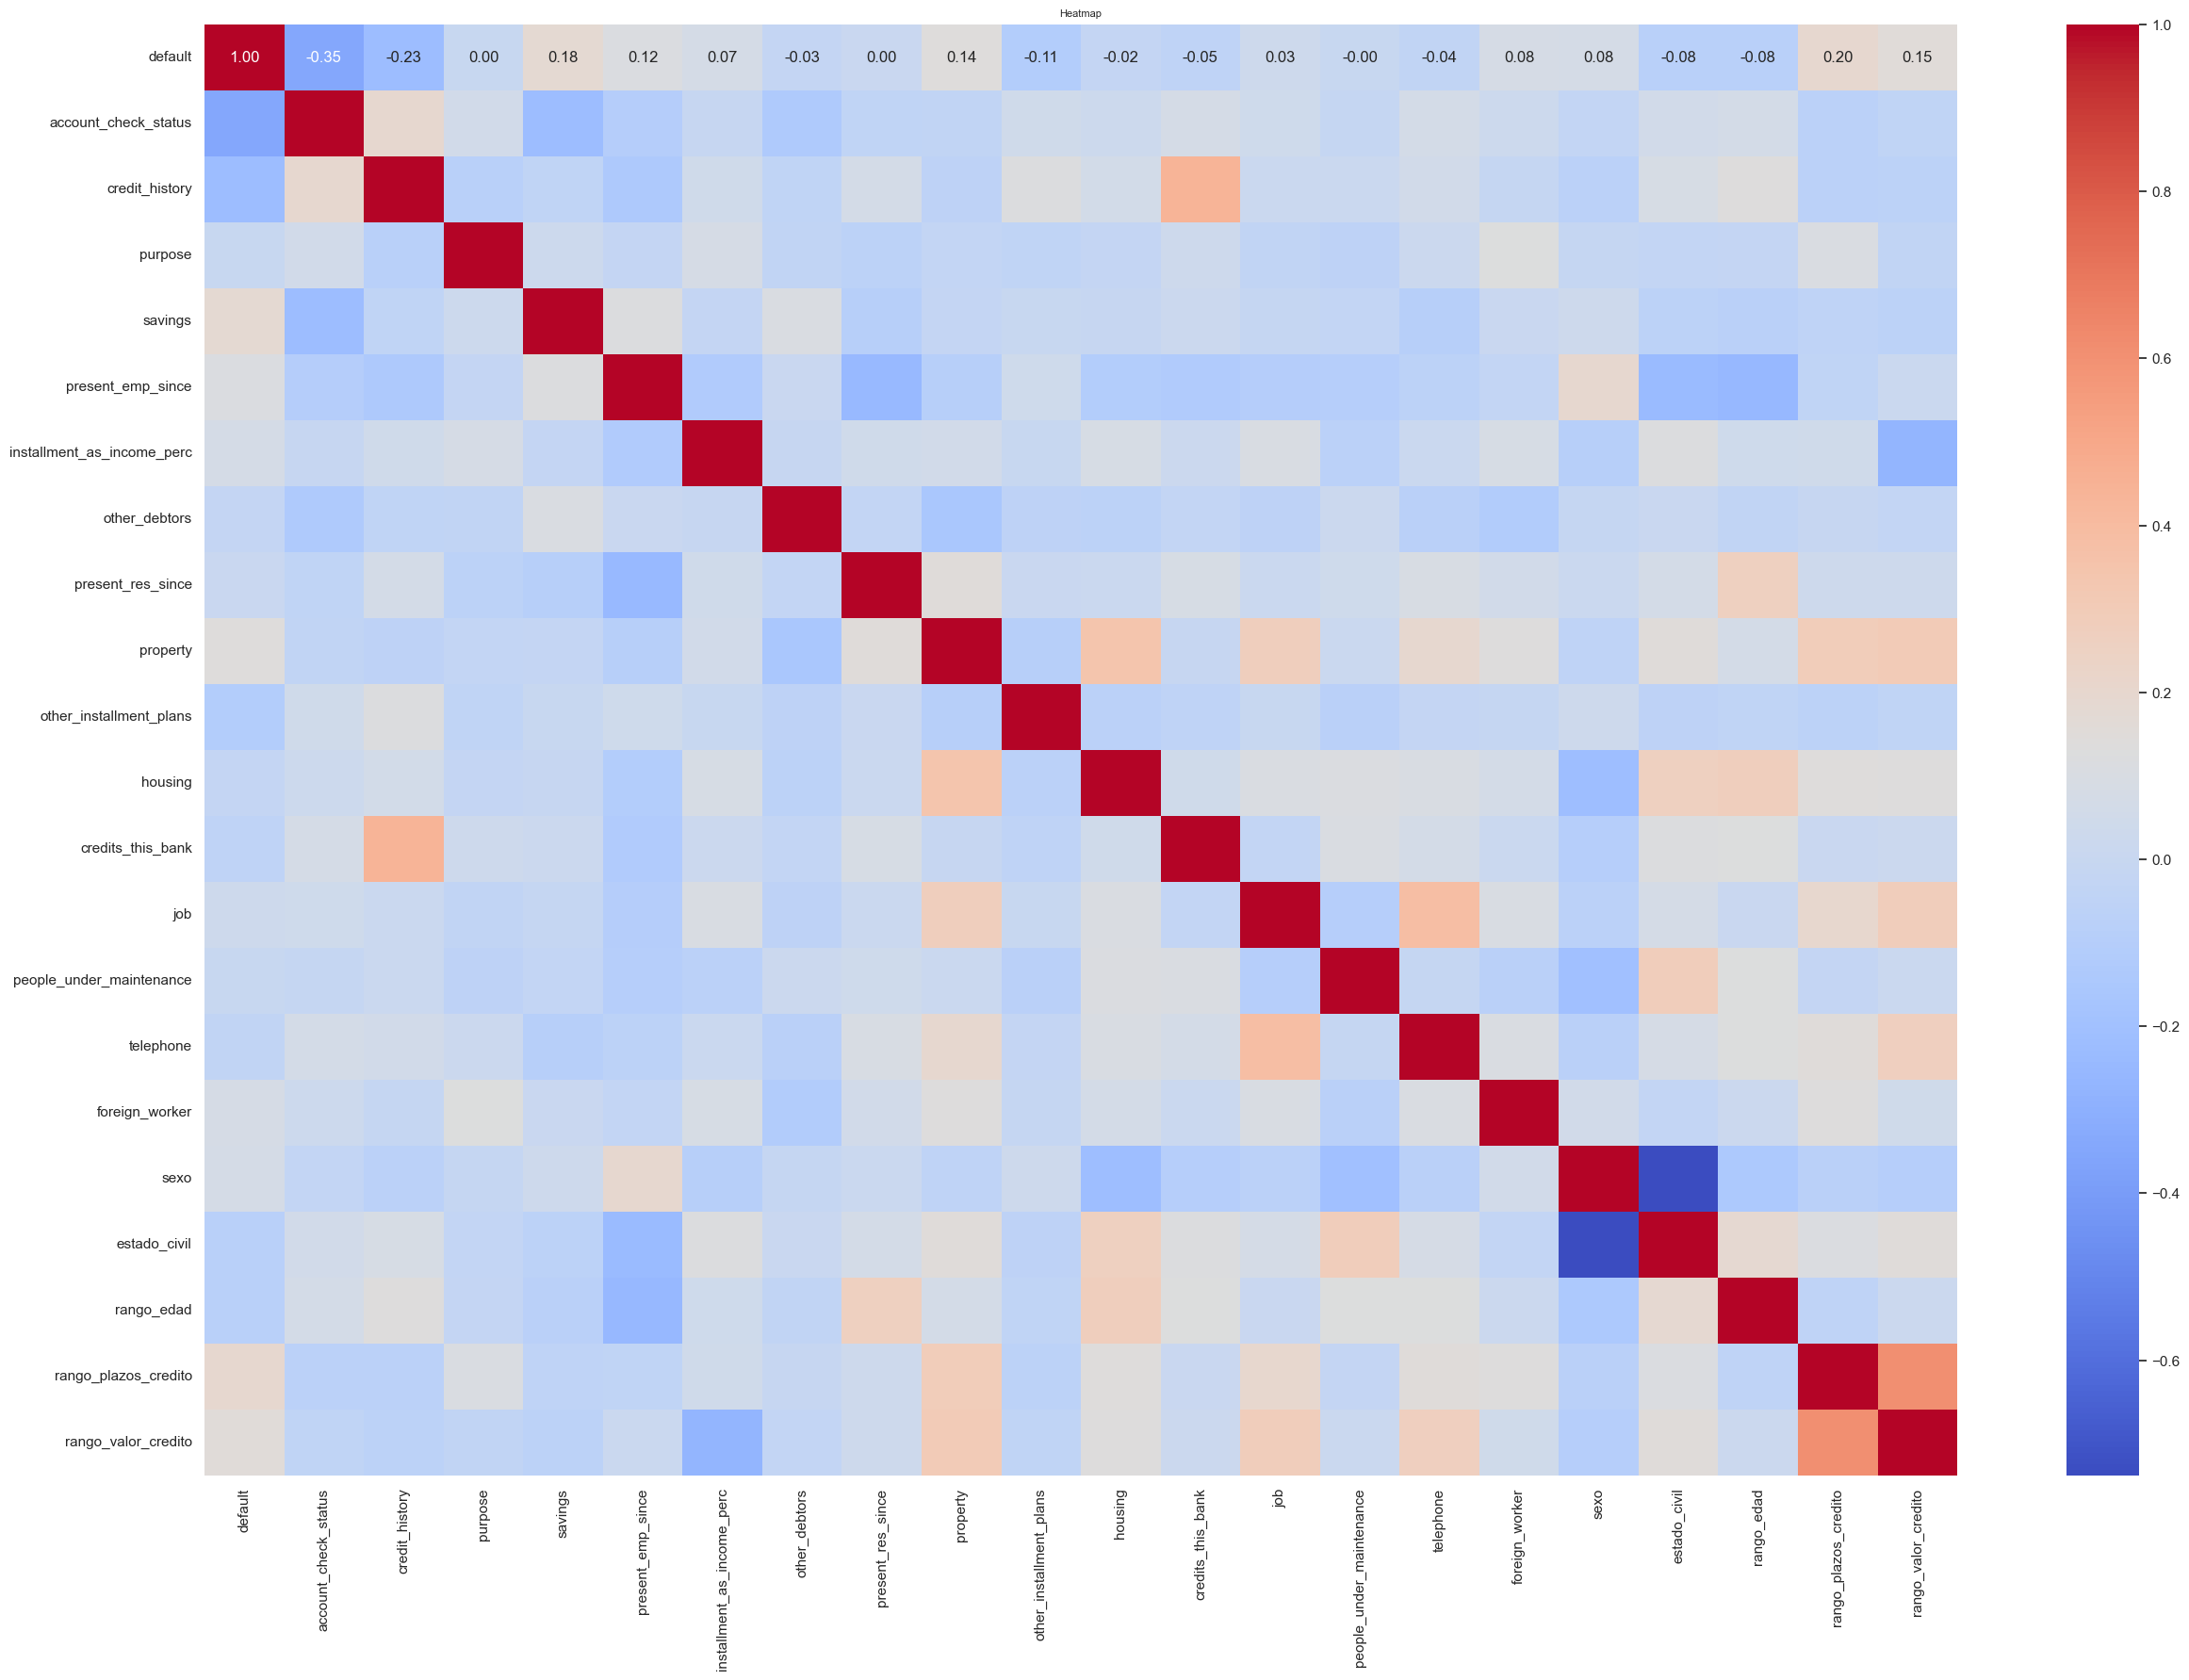

In [22]:
plt.figure(figsize=(30, 20))
heatmap = sns.heatmap(df_bank.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap', fontsize=8)
plt.show()


# **4. Model Building**
-------------------------------


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [26]:
# Load the data
# X represents variables with which a model or a database makes decisions to reach Y
# Y is the variable to be predicted
X = df_bank.drop('default', axis=1)
y = df_bank['default']

# Split the data into training and testing sets
# test_size: Proportion to split the data, in this case, it will select 20% of the total
# random_state: Generates a random number
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("AUC:", auc)

Accuracy: 0.795
Precision: 0.6956521739130435
Recall: 0.5423728813559322
F1 Score: 0.6095238095238096
AUC: 0.721541050607044


In [30]:
def create_models():
    global df_bank, results  # Change df_banco to df_bank
    y = df_bank['default']
    x = df_bank.drop(columns='default')
    train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.30, random_state=77)

    models = {
        'Logistic Regression': LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Naive Bayes': GaussianNB()
    }

    results = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1-score': [], 'AUC-ROC': []}

    for name, model in models.items():
        model.fit(train_x, train_y)
        predictions = model.predict(test_x)
        accuracy = accuracy_score(test_y, predictions)
        precision = precision_score(test_y, predictions)
        recall = recall_score(test_y, predictions)
        f1 = f1_score(test_y, predictions)
        if hasattr(model, "predict_proba"):
            proba = model.predict_proba(test_x)
            roc_auc = roc_auc_score(test_y, proba[:, 1])
        else:
            roc_auc = None

        results['Model'].append(name)
        results['Accuracy'].append(accuracy)
        results['Precision'].append(precision)
        results['Recall'].append(recall)
        results['F1-score'].append(f1)
        results['AUC-ROC'].append(roc_auc)

    results = results


In [29]:
create_models()
for i, model in enumerate(results['Model']):
    print(model)
    print(results['Accuracy'][i])
    print(results['Precision'][i])
    print(results['Recall'][i])
    print(results['F1-score'][i])
    print(results['AUC-ROC'][i])
    print('\n')

Logistic Regression
0.78
0.6785714285714286
0.4418604651162791
0.5352112676056338
0.799934796783308


Decision Tree
0.7
0.47368421052631576
0.4186046511627907
0.4444444444444444
0.6158443816561617


Random Forest
0.7933333333333333
0.74
0.43023255813953487
0.5441176470588235
0.7882253857856988


Naive Bayes
0.74
0.5465116279069767
0.5465116279069767
0.5465116279069767
0.7800478156922409




# **5. Model Evaluation and Selection**
--------

In [31]:
# Visualize Results
def visualize_results():
    global df_bank, results
    results_df = pd.DataFrame(results)
    results_df.set_index('Model', inplace=True)

    # Transpose the DataFrame for easier plotting
    results_df = results_df.T
    colors = ['#0077b6', '#CDDBF3','#9370DB', '#DDA0DD']

    # Grouped bar plot for each metric
    results_df.plot(kind='bar', figsize=(12, 6), colormap='viridis', rot=0, color=colors)
    plt.title('Comparison of Metrics by Model')
    plt.xlabel('Metrics')
    plt.ylabel('Score')
    plt.legend(title='Models')
    plt.tight_layout()
    plt.show()

    from IPython.display import HTML, display

    # Text you want to center
    text = "Which of these models would you choose and why?"

    # Create an HTML cell with centered text
    display(HTML(f"{text}"))


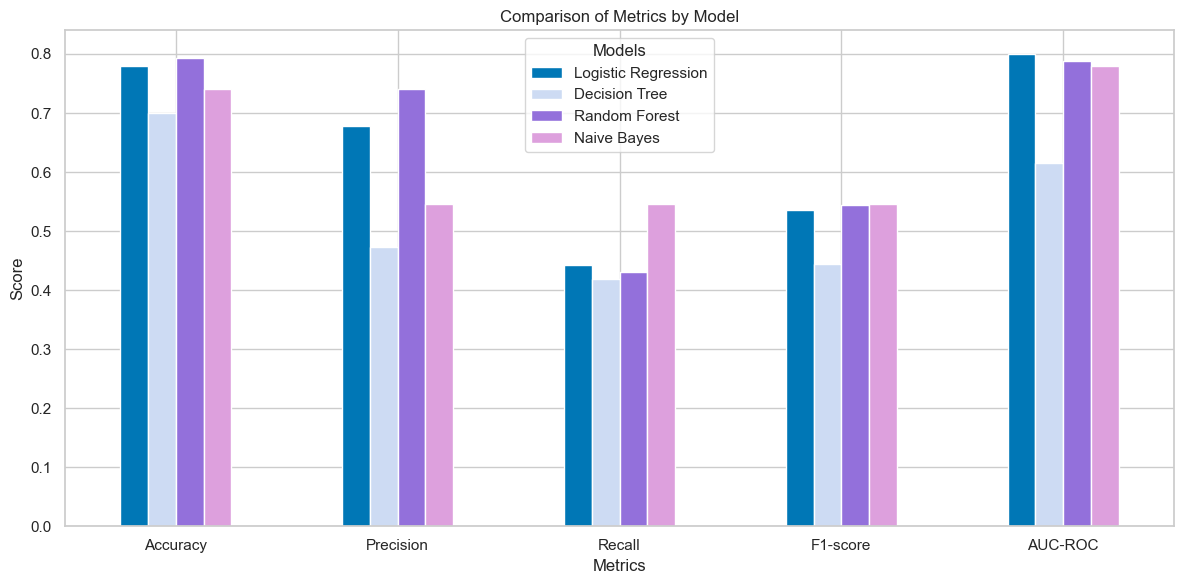

In [33]:
visualize_results()